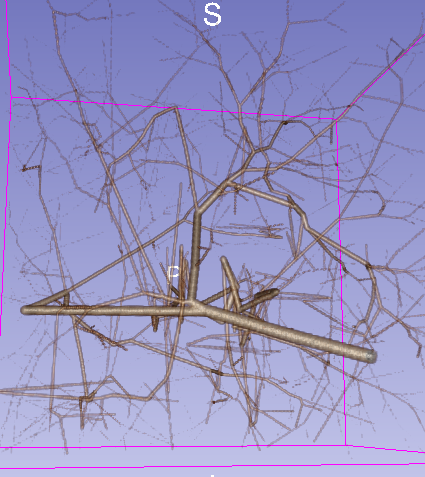

In [1]:
import JupyterNotebooksLib as slicernb
import slicer
import ScreenCapture
import vtk
from PIL import Image
import numpy as np

tree_num = 19
tree_folder_path = 'Tumourous_Trees' #'Healthy_Trees'
# Load stack of images
imageSpacing = [1, 1, 1]
volume = slicer.util.loadVolume("/Users/INOVAIT-VSI/VascuSynth_copy/"+ tree_folder_path +"/image_" +str(tree_num)+ "/original_image/image000.jpg", {"singleFile": False})
volume.SetSpacing(imageSpacing)
    
# Enable 3D volume render
slicernb.showVolumeRendering(volume)
layoutManager = slicer.app.layoutManager()

threeDWidget = layoutManager.threeDWidget(0)
threeDView = threeDWidget.threeDView()
threeDView.resetFocalPoint()
camera = slicer.mrmlScene.GetFirstNodeByClass('vtkMRMLCameraNode').GetCamera()
camera.Dolly(1.20)
slicernb.ViewDisplay("OneUp3D")

In [2]:
def showVolumeRenderingMIP(volumeNode):
  """
  Render volume using maximum intensity projection using same color from slice views
  """
  # Get/create  volume property node & volume rendering display node
  volRenLogic = slicer.modules.volumerendering.logic()
  volPropNode = slicer.mrmlScene.GetFirstNodeByClass("vtkMRMLVolumePropertyNode")
  displayNode = volRenLogic.GetFirstVolumeRenderingDisplayNode(volumeNode)

  # Choose MIP volume rendering preset
  volRenLogic.CopyDisplayToVolumeRenderingDisplayNode(displayNode)

  # Transfer Function to map an opacity value to each point
  opacityTF = vtk.vtkPiecewiseFunction()
  for i in range(1,5):
        opacityTF.AddPoint(i, 1.0)
  # Set Scalar Opacity Mapping
  volPropNode.SetScalarOpacity(opacityTF)

  # Switch views to MIP mode
  for viewNode in slicer.util.getNodesByClass("vtkMRMLViewNode"):
    viewNode.SetRaycastTechnique(slicer.vtkMRMLViewNode.MaximumIntensityProjection)
  # Show volume rendering
  displayNode.SetVisibility(True)

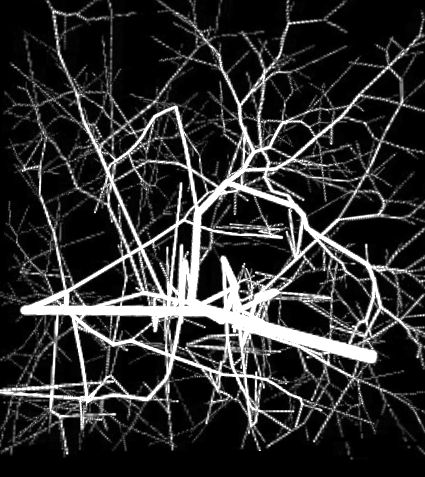

In [3]:
volumeNode = slicer.mrmlScene.GetFirstNodeByClass("vtkMRMLScalarVolumeNode")
showVolumeRenderingMIP(volumeNode)

# Set background to black (required for transparent background)
view = slicer.app.layoutManager().threeDWidget(0).threeDView()
view.mrmlViewNode().SetBackgroundColor(0,0,0)
view.mrmlViewNode().SetBackgroundColor2(0,0,0)
v = slicer.util.getNode("View1")
v.SetBoxVisible(False)
v.SetAxisLabelsVisible(False)

slicernb.ViewDisplay("OneUp3D")

In [4]:
import os
os.getcwd()
os.chdir("C:\\Users\\INOVAIT-VSI\\VascuSynth_copy\\")
# # Make new folders for the MIPs
# if not os.path.exists(tree_folder_path + "/image_"+str(tree_num)+"/Pitch MIPs"):
#     os.makedirs(tree_folder_path + "/image_"+str(tree_num)+"/Pitch MIPs")
# if not os.path.exists(tree_folder_path + "/image_"+str(tree_num)+"/Roll MIPs"):
#     os.makedirs(tree_folder_path + "/image_"+str(tree_num)+"/Roll MIPs")
# if not os.path.exists(tree_folder_path + "/image_"+str(tree_num)+"/Yaw MIPs"):
#     os.makedirs(tree_folder_path + "/image_"+str(tree_num)+"/Yaw MIPs")

In [5]:
from skimage.util import random_noise
import cv2
import matplotlib.pyplot as plt

classification = "Tumorous" # MAKE SURE TO CHANGE!!! "Tumorous" or "Healthy"

start_num = 0 # Change to number at which MIP should start at

os.getcwd()

threeDView.setPitchRollYawIncrement(40)
i = 0
j = 0;
while i<9:
    threeDView.pitch()
    cap = ScreenCapture.ScreenCaptureLogic()
    
    save_folder_path = "Tumorous Images Dataset/MIP_" + str(tree_num) + "_" + str(j) + ".png"
    
    cap.captureImageFromView(threeDView, save_folder_path)
    
    img = cv2.imread(save_folder_path)
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
    
    plt.imsave(save_folder_path, img)
    i+=1
    j+=1
    
    
    # OLD code, without resize and with noise
    '''
    print(save_folder_path)
    cap.captureImageFromView(threeDView, save_folder_path)
    # Add speckle noise to the MIP images
    img = cv2.imread(save_folder_path)
    #img_noisy = random_noise(img, mode="speckle", mean=0, var=0.05)
    plt.imsave(save_folder_path, img)
    i+=1
    j+=1
    '''

i = 0
while i<9:
    threeDView.roll()
    cap = ScreenCapture.ScreenCaptureLogic()
    
    save_folder_path = "Tumorous Images Dataset/MIP_" + str(tree_num) + "_" + str(j) + ".png"
    
    cap.captureImageFromView(threeDView, save_folder_path)
    img = cv2.imread(save_folder_path)
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
    
    plt.imsave(save_folder_path, img)
    i+=1
    j+=1

i = 0
while i<9:
    threeDView.yaw()
    cap = ScreenCapture.ScreenCaptureLogic()
    
    save_folder_path = "Tumorous Images Dataset/MIP_" + str(tree_num) + "_" + str(j) + ".png"
    
    cap.captureImageFromView(threeDView, save_folder_path)
    img = cv2.imread(save_folder_path)
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
    
    plt.imsave(save_folder_path, img)
    print(save_folder_path)
    i+=1
    j+=1

Tumorous Images Dataset/MIP_19_18.png
Tumorous Images Dataset/MIP_19_19.png
Tumorous Images Dataset/MIP_19_20.png
Tumorous Images Dataset/MIP_19_21.png
Tumorous Images Dataset/MIP_19_22.png
Tumorous Images Dataset/MIP_19_23.png
Tumorous Images Dataset/MIP_19_24.png
Tumorous Images Dataset/MIP_19_25.png
Tumorous Images Dataset/MIP_19_26.png


In [6]:
((256*256*256 *0.35)**1/3)/(256*256*256)

0.11666666666666665

In [5]:
# ------------------------------------------------------------TEST
from skimage.util import random_noise
import cv2
import matplotlib.pyplot as plt

classification = "Tumorous" # MAKE SURE TO CHANGE!!! "Tumorous" or "Healthy"

start_num = 0 # Change to number at which MIP should start at

os.getcwd()

threeDView.setPitchRollYawIncrement(90)
i = 0
j = 0;
#while i<4:

    cap = ScreenCapture.ScreenCaptureLogic()
    
    save_folder_path = "Tumorous Images Dataset/AAAMIP_" + str(tree_num) + "WWWWWWWWWWWWWW_" + str(j) + ".png"
    
    print(save_folder_path)
    
    
    cap.captureImageFromView(threeDView, save_folder_path)
    # Add speckle noise to the MIP images
    img = cv2.imread(save_folder_path)
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
    #img_noisy = random_noise(img, mode="speckle", mean=0, var=0.05)
    plt.imsave(save_folder_path, img)
    i+=1
    j+=1
    
    
    '''
    cap.captureImageFromView(threeDView, save_folder_path)
    img = Image.open(save_folder_path).resize(size=(256, 256)).convert('L')
    #im = np.asarray(img)#.astype(bool)
    # Add speckle noise to the MIP images
    #img = cv2.imread(save_folder_path)
    #print(im.shape)
    #ims = Image.fromarray(im)
    img.save(save_folder_path)
    #img_noisy = random_noise(img, mode="speckle", mean=0, var=0.05)
    #plt.imsave(save_folder_path, im)
    i+=1
    j+=1
    '''
    threeDView.pitch()   

Tumorous Images Dataset/AAAMIP_0WWWWWWWWWWWWWW_0.png
Tumorous Images Dataset/AAAMIP_0WWWWWWWWWWWWWW_1.png
Tumorous Images Dataset/AAAMIP_0WWWWWWWWWWWWWW_2.png
Tumorous Images Dataset/AAAMIP_0WWWWWWWWWWWWWW_3.png


In [ ]:
threeDView.yaw()
slicernb.ViewDisplay("OneUp3D")

In [1]:
########################################################################################
tree_num = 19

In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = open('C:\\Users\\INOVAIT-VSI\\VascuSynth_copy\\Tumourous_Trees\\oxMap_' + str(tree_num) + '.txt', 'r')

In [4]:
a =file.read()
b=re.split('\s', a)[0:16]

In [5]:
def sphere_idx(shape, radius, position):
    assert len(position) == len(shape)
    n = len(shape)
    position = np.array(position).reshape((-1,) + (1,) * n)
    arr = np.linalg.norm(np.indices(shape) - position, axis=0)
    return (arr > radius).astype('int64') # + value (for gradient)

In [6]:
shape = (int(b[0])+1, int(b[1])+1, int(b[2])+1)

In [7]:
radius = abs(int(b[13]) - int(b[10]))//2

In [8]:
position = np.floor((int(b[10])+radius, int(b[11])+radius, int(b[12])+radius))

In [9]:
arr =sphere_idx(shape, radius, position)

In [10]:
# plt.imshow(np.rot90(arr[:,:,int(position[2])],1), cmap='Greys_r')

In [11]:
truth_folder_path = 'C:\\Users\\INOVAIT-VSI\\VascuSynth_copy\\Tumorous Images\\oxyMap_' + str(tree_num)
if not os.path.exists(truth_folder_path): os.makedirs(truth_folder_path)


for i in range(0,shape[1]):
    plt.imsave(truth_folder_path + '\\image' + str(i) + '.jpg', np.rot90(arr[:,abs(shape[1]-1-i),:],1), vmin=0, vmax=1, cmap='Greys')

Volume size: (256, 256, 256)


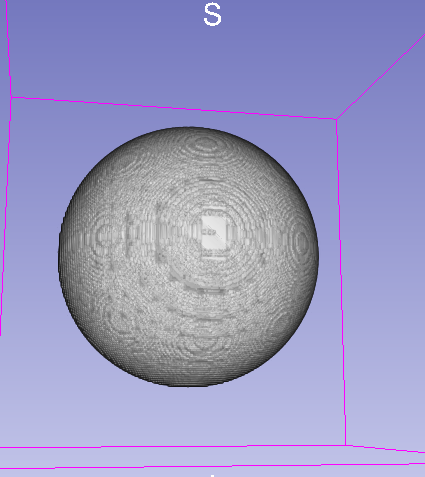

In [12]:
import JupyterNotebooksLib as slicernb
import slicer
import ScreenCapture
import vtk
imageSpacing = [1, 1, 1]
volume = slicer.util.loadVolume("/Users/INOVAIT-VSI/VascuSynth_copy/Tumorous Images/oxyMap_" + str(tree_num) + "/image0.jpg", {"singleFile": False})
volume.SetSpacing(imageSpacing)
print("Volume size: {0}".format(volume.GetImageData().GetDimensions()))

# Enable 3D volume render
slicernb.showVolumeRendering(volume)
layoutManager = slicer.app.layoutManager()
threeDWidget = layoutManager.threeDWidget(0)
threeDView = threeDWidget.threeDView()

threeDView.resetFocalPoint()
camera = slicer.mrmlScene.GetFirstNodeByClass('vtkMRMLCameraNode').GetCamera()

camera.Dolly(1.20)
slicernb.ViewDisplay("OneUp3D")

In [13]:
def showVolumeRenderingMIP(volumeNode):
  """
  Render volume using maximum intensity projection using same color from slice views
  """
  # Get/create  volume property node & volume rendering display node
  volRenLogic = slicer.modules.volumerendering.logic()
  volPropNode = slicer.mrmlScene.GetFirstNodeByClass("vtkMRMLVolumePropertyNode")
  displayNode = volRenLogic.GetFirstVolumeRenderingDisplayNode(volumeNode)

  # Choose MIP volume rendering preset
  volRenLogic.CopyDisplayToVolumeRenderingDisplayNode(displayNode)

  # Transfer Function to map an opacity value to each point
  opacityTF = vtk.vtkPiecewiseFunction()
  for i in range(1,5):
        opacityTF.AddPoint(i, 1.0)
  # Set Scalar Opacity Mapping
  volPropNode.SetScalarOpacity(opacityTF)

  # Switch views to MIP mode
  for viewNode in slicer.util.getNodesByClass("vtkMRMLViewNode"):
    viewNode.SetRaycastTechnique(slicer.vtkMRMLViewNode.MaximumIntensityProjection)
  # Show volume rendering
  displayNode.SetVisibility(True)

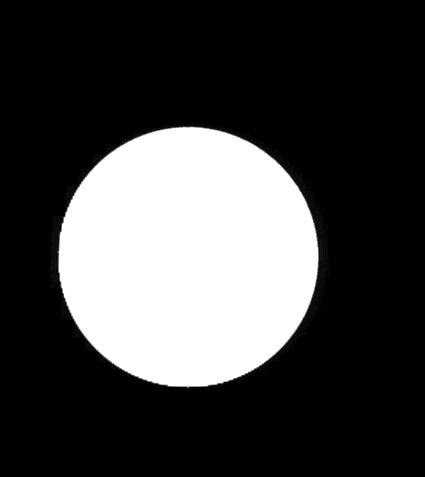

In [14]:
volumeNode = slicer.mrmlScene.GetFirstNodeByClass("vtkMRMLScalarVolumeNode")
showVolumeRenderingMIP(volumeNode)
# Set background to black (required for transparent background)
view = slicer.app.layoutManager().threeDWidget(0).threeDView()
view.mrmlViewNode().SetBackgroundColor(0,0,0)
view.mrmlViewNode().SetBackgroundColor2(0,0,0)
v = slicer.util.getNode("View1")
v.SetBoxVisible(False)
v.SetAxisLabelsVisible(False)

slicernb.ViewDisplay("OneUp3D")

In [15]:
import os
os.getcwd()
os.chdir("C:\\Users\\INOVAIT-VSI\\VascuSynth_copy\\")

In [16]:
from skimage.util import random_noise
import cv2
import matplotlib.pyplot as plt

classification = "Tumorous" # MAKE SURE TO CHANGE!!! "Tumorous" or "Healthy"

start_num = 0 # Change to number at which MIP should start at

os.getcwd()

threeDView.setPitchRollYawIncrement(40)
i = 0
j = 0;
while i<9:
    threeDView.pitch()
    cap = ScreenCapture.ScreenCaptureLogic()
    
    save_folder_path = "Tumorous Images Dataset/Mask_" + str(tree_num) + "_" + str(j) + ".png"
    
    print(save_folder_path)
    cap.captureImageFromView(threeDView, save_folder_path)
    img = cv2.imread(save_folder_path)
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
    
    plt.imsave(save_folder_path, img)
    i+=1
    j+=1

i = 0
while i<9:
    threeDView.roll()
    cap = ScreenCapture.ScreenCaptureLogic()
    
    save_folder_path = "Tumorous Images Dataset/Mask_" + str(tree_num) + "_" + str(j) + ".png"
    
    print(save_folder_path)
    cap.captureImageFromView(threeDView, save_folder_path)
    img = cv2.imread(save_folder_path)
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
    
    plt.imsave(save_folder_path, img)
    i+=1
    j+=1

i = 0
while i<9:
    threeDView.yaw()
    cap = ScreenCapture.ScreenCaptureLogic()
    
    save_folder_path = "Tumorous Images Dataset/Mask_" + str(tree_num) + "_" + str(j) + ".png"
    
    print(save_folder_path)
    cap.captureImageFromView(threeDView, save_folder_path)
    img = cv2.imread(save_folder_path)
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
    
    plt.imsave(save_folder_path, img)
    i+=1
    j+=1

Tumorous Images Dataset/Mask_19_0.png
Tumorous Images Dataset/Mask_19_1.png
Tumorous Images Dataset/Mask_19_2.png
Tumorous Images Dataset/Mask_19_3.png
Tumorous Images Dataset/Mask_19_4.png
Tumorous Images Dataset/Mask_19_5.png
Tumorous Images Dataset/Mask_19_6.png
Tumorous Images Dataset/Mask_19_7.png
Tumorous Images Dataset/Mask_19_8.png
Tumorous Images Dataset/Mask_19_9.png
Tumorous Images Dataset/Mask_19_10.png
Tumorous Images Dataset/Mask_19_11.png
Tumorous Images Dataset/Mask_19_12.png
Tumorous Images Dataset/Mask_19_13.png
Tumorous Images Dataset/Mask_19_14.png
Tumorous Images Dataset/Mask_19_15.png
Tumorous Images Dataset/Mask_19_16.png
Tumorous Images Dataset/Mask_19_17.png
Tumorous Images Dataset/Mask_19_18.png
Tumorous Images Dataset/Mask_19_19.png
Tumorous Images Dataset/Mask_19_20.png
Tumorous Images Dataset/Mask_19_21.png
Tumorous Images Dataset/Mask_19_22.png
Tumorous Images Dataset/Mask_19_23.png
Tumorous Images Dataset/Mask_19_24.png
Tumorous Images Dataset/Mask_19_25.

In [18]:
from skimage.util import random_noise
import cv2
import matplotlib.pyplot as plt

classification = "Tumorous" # MAKE SURE TO CHANGE!!! "Tumorous" or "Healthy"

start_num = 0 # Change to number at which MIP should start at

os.getcwd()

threeDView.setPitchRollYawIncrement(90)
i = 0
j = 0;
while i<4:
    cap = ScreenCapture.ScreenCaptureLogic()
    
    save_folder_path = "Tumorous Images Dataset/MASK_" + str(tree_num) + "WWWWWWWWWWWWWW_" + str(j) + ".png"
    
    
    cap.captureImageFromView(threeDView, save_folder_path)
    # Add speckle noise to the MIP images
    img = cv2.imread(save_folder_path)
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
    #img_noisy = random_noise(img, mode="speckle", mean=0, var=0.05)
    plt.imsave(save_folder_path, img)
    i+=1
    j+=1
    
    threeDView.pitch()